# Prior checks

We want to fully understand the location of the priors on $P$ and $i$, and make sure that we are actually obtaining prior information beyond this space.

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set_palette('colorblind')
import pandas as pd
import astropy.units as u

## Set up priors

In [54]:
mu_xsplit = 0.75
sigma_xsplit = 0.75

npts = 10000

In [55]:
np.random.seed(11)
xsplit = np.random.lognormal(np.log(mu_xsplit), sigma_xsplit, size=npts)
cosi = np.random.uniform(0, 1, size=npts)
i = np.arccos(cosi)
split = xsplit/np.sin(i)
P = 1./(u.Quantity(split, u.microhertz).to(1/u.day)).value

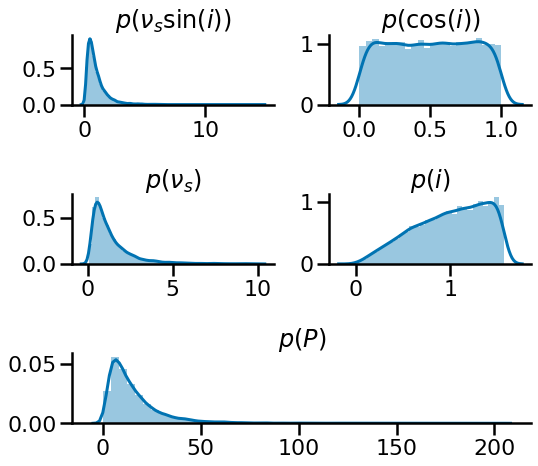

In [56]:
fig = plt.figure(figsize=(8,7))

ax = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(ax[0,0])
sns.distplot(xsplit, ax=ax0)
ax0.set_title(r'$p(\nu_s \sin(i))$')

ax1 = fig.add_subplot(ax[0,1])
sns.distplot(cosi, ax=ax1)
ax1.set_title(r'$p(\cos(i))$')

ax2 = fig.add_subplot(ax[1,0])
sns.distplot(split[split < 10], ax=ax2)
ax2.set_title(r'$p(\nu_s)$')

ax3 = fig.add_subplot(ax[1,1])
sns.distplot(i, ax=ax3)
ax3.set_title(r'$p(i)$')

ax4 = fig.add_subplot(ax[2,:])
sns.distplot(P, ax=ax4)
ax4.set_title(r'$p(P)$')

sns.despine()
fig.tight_layout()

plt.show()

## Let's check the location these priors take up in our data

In [57]:
ati = pd.read_csv('../../data/atium.csv',index_col=0)
ati = ati[np.isfinite(ati.nus.values)]
print(f'We have {len(ati)} stars with results right now.')

We have 68 stars with results rigt now.


## Period/Temperature

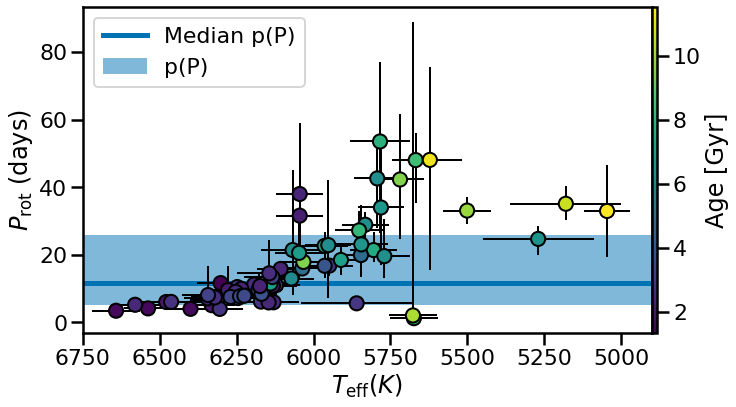

In [86]:
fig = plt.figure(figsize=(12,6))
ax = plt.gca()
ax.invert_xaxis()
c = ax.scatter(ati.Teff, ati.P, c=ati.age, s=200, ec='k', lw=2, zorder=3)
ax.errorbar(ati.Teff, ati.P, c='k', lw=2, xerr=ati.eTeff, yerr=[ati.l_P, ati.u_P], fmt='|', zorder=2)

l, m, u = np.percentile(P, [16., 50., 84])
xrange = np.linspace(4900, 6750, 100)
ax.fill_between(xrange, l, u, zorder=0, alpha=.5, label='p(P)')
ax.axhline(m, zorder=1, label='Median p(P)', lw=5)

ax.legend(loc='upper left')
ax.set_xlim(6750, 4900)
ax.set_ylabel(r'$P_{\rm rot}$ (days)')
ax.set_xlabel(r'$T_{\rm eff} (K)$')
fig.colorbar(c,label=r'Age [Gyr]', pad=0,aspect=60)

There does appear to be a clustering of stars in this region at high temperatures, but because they have smaller spreads than $p(P)$, I'm inclined to believe everything is okay.

## Period/Inclination

In [101]:
cmap = sns.color_palette('colorblind')

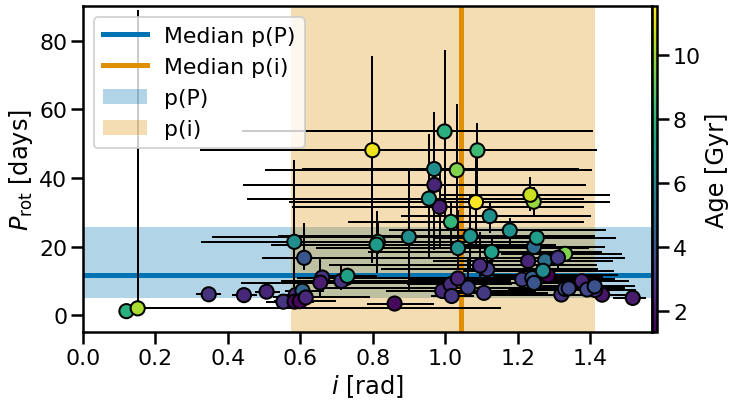

In [104]:
fig = plt.figure(figsize=(12,6))
ax = plt.gca()
c = ax.scatter(ati.i, ati.P, c=ati.age, s=200, ec='k', lw=2, zorder=3)
ax.errorbar(ati.i, ati.P, c='k', lw=2, xerr=[ati.l_i, ati.u_i], yerr=[ati.l_P, ati.u_P], fmt='|', zorder=2)

lp, mp, up = np.percentile(P, [16., 50., 84])
li, mi, ui = np.percentile(i, [16., 50., 84])
xrange = np.linspace(0, np.pi/2, 100)
yrange = np.linspace(li, ui, 100)
ax.fill_between(xrange, lp, up, zorder=0, alpha=.3, label='p(P)')
ax.axhline(mp, zorder=1, label='Median p(P)', lw=5)
ax.fill_between(yrange, -5, 90, zorder=0, alpha=.3, label='p(i)')
ax.axvline(mi, zorder=1, label='Median p(i)', lw=5, c=cmap[1])

ax.set_xlim(0, np.pi/2)
ax.set_ylim(-5, 90)

ax.legend(loc='upper left')
ax.set_ylabel(r'$P_{\rm rot}$ [days]')
ax.set_xlabel(r'$i$ [rad]')
fig.colorbar(c,label=r'Age [Gyr]', pad=0,aspect=60)

My impression from this is that there are a considerable number of stars for which the inclination angle cannot be constrained, and is therefore sampling from the priors directly.

## Quantitative checks

If a star has prior distributions that have a similar spread to that of our posterior distributions, we'll know that our data has not been highly informative. We can flag this for any stars.

**Question**: Should we be concerned when we sample the priors in $i$, but not in $P$? How does this bias our results on $P$?